# Real Range Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.706295,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,50.130024,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,50.275055,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.536114,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,50.062340,102349600


In [3]:

df['RRI'] = (df['Adj Close'] - df['Open']) / (df['High'] - df['Low'])


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RRI
Date,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.706295,271742800,-0.967377
2018-08-02,50.145000,52.095001,50.087502,51.847500,50.130024,249616000,-0.007460
2018-08-03,51.757500,52.185001,51.369999,51.997501,50.275055,133789600,-1.818945
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.536114,101701600,-2.686039
2018-08-07,52.330002,52.375000,51.689999,51.777500,50.062340,102349600,-3.310449


Text(0.5, 0, 'Date')

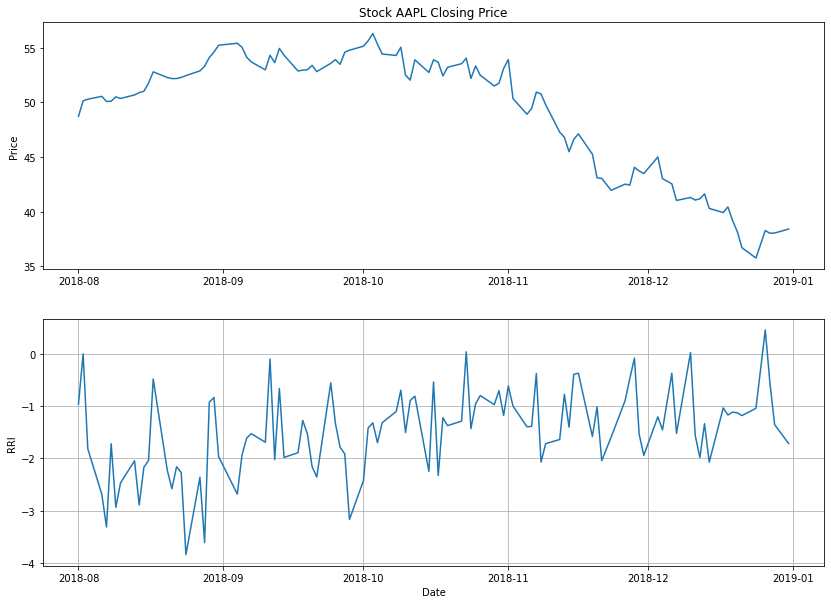

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RRI'], label='Real Range Indicator')
ax2.grid()
ax2.set_ylabel('RRI')
ax2.set_xlabel('Date')

## Candlestick with RRI

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RRI,VolumePositive
0,17744.0,49.782501,50.439999,49.327499,50.375000,48.706295,271742800,-0.967377,False
1,17745.0,50.145000,52.095001,50.087502,51.847500,50.130024,249616000,-0.007460,False
2,17746.0,51.757500,52.185001,51.369999,51.997501,50.275055,133789600,-1.818945,False
3,17749.0,52.000000,52.312500,51.767502,52.267502,50.536114,101701600,-2.686039,False
4,17750.0,52.330002,52.375000,51.689999,51.777500,50.062340,102349600,-3.310449,False


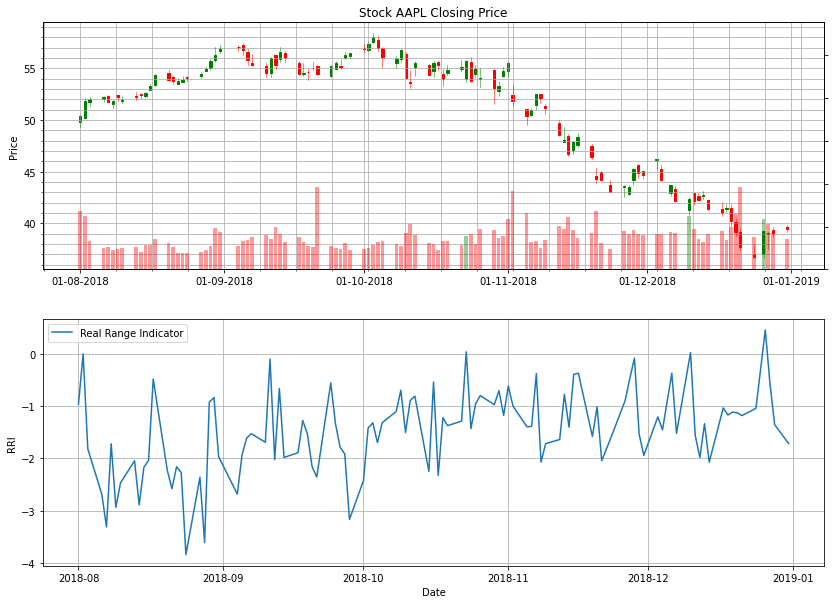

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RRI'], label='Real Range Indicator')
ax2.grid()
ax2.set_ylabel('RRI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')